
# Classificador K-Nearest Neighbors (KNN)

Este notebook explora o classificador K-Nearest Neighbors (KNN) em um conjunto de dados específico,
incluindo a análise de performance e ajuste de hiperparâmetros para melhorar a precisão.

## Conteúdos:
1. Pré-processamento dos Dados
2. Implementação e Treinamento do KNN
3. Avaliação de Desempenho e Otimização


#KNN Classification

Referências

    https://ai.plainenglish.io/introduction-to-k-nearest-neighbors-knn-algorithm-e8617a448fa8

    https://medium.com/brasil-ai/knn-k-nearest-neighbors-1-e140c82e9c4e

    https://www.kaggle.com/code/prashant111/knn-classifier-tutorial



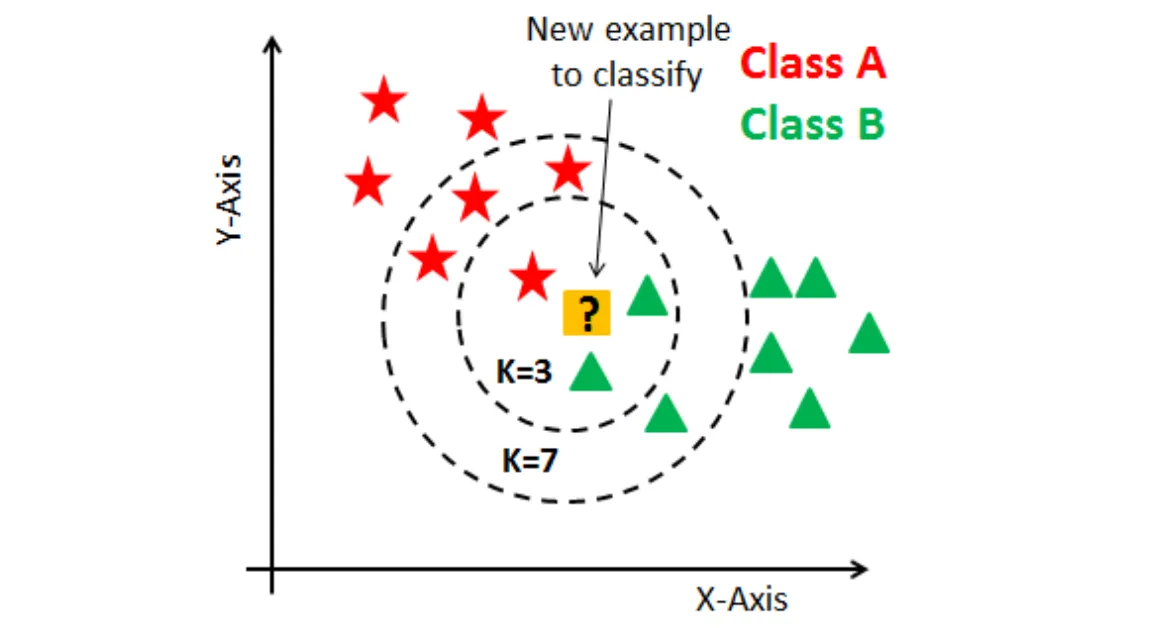

In [16]:
from sklearn import datasets

import pandas as pd

In [17]:

# Dividir os dados em conjuntos de treino e teste
# Isso ajuda a avaliar a capacidade de generalização dos modelos.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
#Load dataset
iris = datasets.load_iris()

In [20]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [21]:
X = pd.DataFrame(data=iris.data, columns=iris.feature_names)
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [22]:
y = pd.Series(data=iris.target,name='CLASS')
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: CLASS, Length: 150, dtype: int64

In [23]:

# Dividir os dados em conjuntos de treino e teste
# Isso ajuda a avaliar a capacidade de generalização dos modelos.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Split dataset into training set and test set
# 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [24]:
k=5
clf_knn = KNeighborsClassifier(n_neighbors=k)

In [25]:
clf_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [26]:
#Predict the response for test dataset
y_pred = clf_knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9777777777777777


In [27]:
# Finding the best k value

for k in range(1,22,2):
    clf_knn = KNeighborsClassifier(n_neighbors=k)
    clf_knn.fit(X_train, y_train)

    #Predict the response for test dataset
    y_pred = clf_knn.predict(X_test)
    print(f"k={k}\tAccuracy: {accuracy_score(y_test, y_pred)}")

k=1	Accuracy: 0.9777777777777777
k=3	Accuracy: 0.9777777777777777
k=5	Accuracy: 0.9777777777777777
k=7	Accuracy: 0.9777777777777777
k=9	Accuracy: 0.9777777777777777
k=11	Accuracy: 0.9777777777777777
k=13	Accuracy: 0.9555555555555556
k=15	Accuracy: 0.9555555555555556
k=17	Accuracy: 0.9555555555555556
k=19	Accuracy: 0.9777777777777777
k=21	Accuracy: 0.9555555555555556


### Exercícios:

1) Agora refaça o exercício acima, mas coloque um laço (`for`) adicional mais externo para gerar um novo particionamento (split). Para cada particionamento rodar novamente para todos os valores de k. Este processo deve ser repetido 10 vezes e calculada a média, mediana e desvio padrão para as 10 vezes de cada `k`.

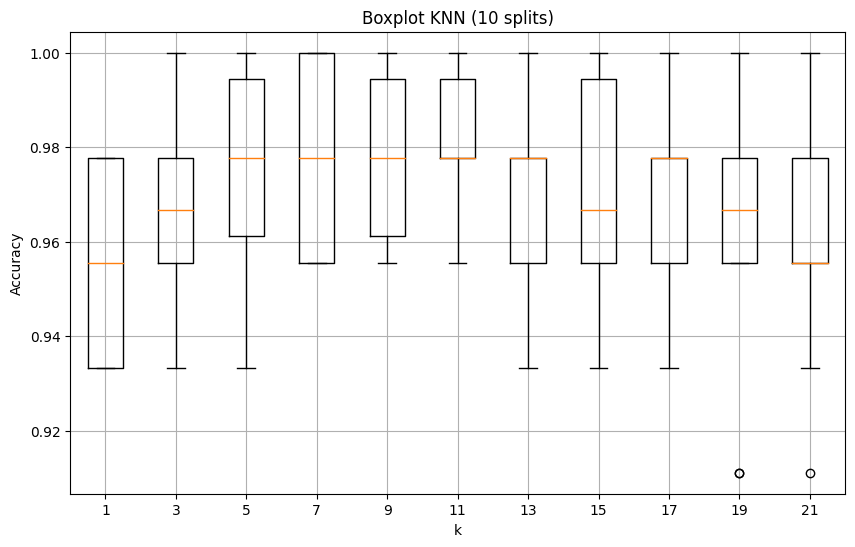

In [28]:

# Dividir os dados em conjuntos de treino e teste
# Isso ajuda a avaliar a capacidade de generalização dos modelos.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score



results = {k: [] for k in range(1, 22, 2)}
num_splits = 10

for _ in range(num_splits):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)
    for k in range(1, 22, 2):
      clf_knn = KNeighborsClassifier(n_neighbors=k)
      clf_knn.fit(X_train, y_train)
      y_pred = clf_knn.predict(X_test)
      accuracy = accuracy_score(y_test, y_pred)
      results[k].append(accuracy)


means = [np.mean(results[k]) for k in range(1, 22, 2)]
medians = [np.median(results[k]) for k in range(1, 22, 2)]
std_devs = [np.std(results[k]) for k in range(1, 22, 2)]


plt.figure(figsize=(10, 6))
plt.boxplot(results.values())
plt.xticks(range(1, len(results) + 1), [str(k) for k in range(1, 22, 2)])
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Boxplot KNN (10 splits)')
plt.grid(True)
plt.show()

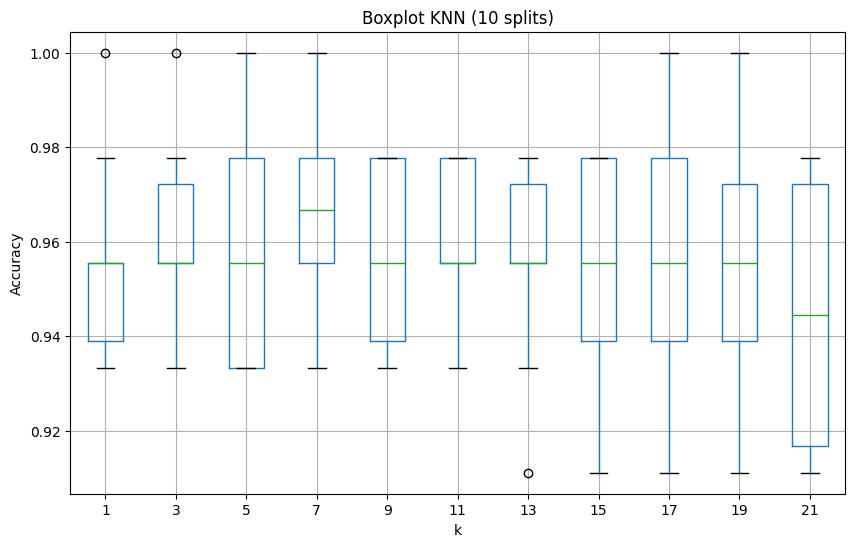

In [29]:

# Dividir os dados em conjuntos de treino e teste
# Isso ajuda a avaliar a capacidade de generalização dos modelos.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
results = pd.DataFrame(columns=range(1, 22, 2))
num_splits = 10

for _ in range(num_splits):
    accuracies = []
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)
    for k in range(1, 22, 2):
        clf_knn = KNeighborsClassifier(n_neighbors=k)
        clf_knn.fit(X_train, y_train)
        y_pred = clf_knn.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
    results = pd.concat([results, pd.DataFrame([accuracies], columns=range(1, 22, 2))], ignore_index=True)

plt.figure(figsize=(10, 6))
results.boxplot()
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Boxplot KNN (10 splits)')
plt.grid(True)
plt.show()